In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import reg_helper as RHelper
import pandas as pd

Using TensorFlow backend.


In [2]:
folder = 'data/'
X = np.load(folder+'X_all.npy')
y = np.load(folder+'y_all.npy').reshape(-1)

In [3]:
from lightgbm import LGBMClassifier

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [5]:
# Armo indices de train, val
N_train = len(X)//2
cv_s = [(np.arange(N_train), np.arange(N_train, 2*N_train))]

In [6]:
cv_s

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58]),
  array([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
          72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
          85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
         111, 112, 113, 114, 115, 116, 117]))]

In [7]:
X_train = X[cv_s[0][0]]
y_train = y[cv_s[0][0]]
X_val = X[cv_s[0][1]]
y_val = y[cv_s[0][1]]

In [15]:
param_dist = {"max_depth": randint(1, 31),
              'learning_rate': np.logspace(-6, -1, 100),
              'reg_lambda': np.logspace(-8, -3, 100),
              'min_child_samples': randint(1, 20),
              'min_child_weight': np.logspace(-8, -1, 100)
              }
n_estimators = 2000
model = LGBMClassifier(n_estimators=n_estimators)
clf = RandomizedSearchCV(model, param_dist, n_jobs=-1, verbose=1, cv=cv_s, n_iter=5000)
clf.fit(X, y, early_stopping_rounds=100, eval_set=(X_val, y_val), verbose=0)

Fitting 1 folds for each of 5000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 1300 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 2000 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 2900 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 4000 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.6min finished


RandomizedSearchCV(cv=[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58]),
                        array([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104,...
       1.09749877e-04, 1.23284674e-04, 1.38488637e-04, 1.55567614e-04,
       1.74752840e-04, 1.96304065e-04, 2.20513074e-04, 2.47707636e-04,
       2.78255940e-04, 3.12571585e-04, 3.51119173e-04, 3.94420606e-04,
       4.43062146e-04, 4.97702356e-04, 5.59081018e-04, 6.28029144e-04,
       7.05480231e-04, 7.92482898e-04, 8.90215085e-04, 1.00000000e-03])},
                   pre_dispatch='2*n_jobs', random_state=None, refi

In [28]:
clf.best_params_

{'learning_rate': 0.0792482898353917,
 'max_depth': 4,
 'min_child_samples': 2,
 'min_child_weight': 7.742636826811278e-05,
 'reg_lambda': 3.678379771828634e-07}

In [29]:
clf.best_score_

0.8135593220338984

In [30]:
# clf.best_estimator_.score(X_val, y_val)

In [33]:
results_df = pd.DataFrame(clf.cv_results_)
results_df.drop(columns=['std_fit_time', 'mean_score_time', 'std_score_time', 'params', 
                         'std_test_score']).sort_values('rank_test_score').head(10)

,mean_fit_time,param_learning_rate,param_max_depth,param_min_child_samples,param_min_child_weight,param_reg_lambda,split0_test_score,mean_test_score,rank_test_score
4136,0.017673,0.0792483,4,2,7.74264e-05,3.67838e-07,0.813559,0.813559,1
3325,0.023109,0.0497702,10,2,5.59081e-05,0.000247708,0.796610,0.796610,2
2801,0.043154,0.0138489,6,2,2.59502e-07,7.22081e-08,0.796610,0.796610,2
3096,0.025259,0.1,2,1,0.000242013,5.72237e-08,0.796610,0.796610,2
1406,0.346101,0.00033516,4,2,1e-08,2.15443e-05,0.796610,0.796610,2
1879,0.327767,0.000376494,4,2,1.59228e-07,1.78865e-08,0.796610,0.796610,2
2892,0.230957,0.00170735,10,2,8.11131e-07,1.6681e-06,0.796610,0.796610,2
1197,0.043152,0.010975,10,2,0.00170735,8.69749e-05,0.796610,0.796610,2
1591,0.248584,0.00151991,10,2,5.59081e-05,0.000497702,0.796610,0.796610,2
487,0.357517,0.000376494,4,2,0.000174753,3.19927e-08,0.796610,0.796610,2


800


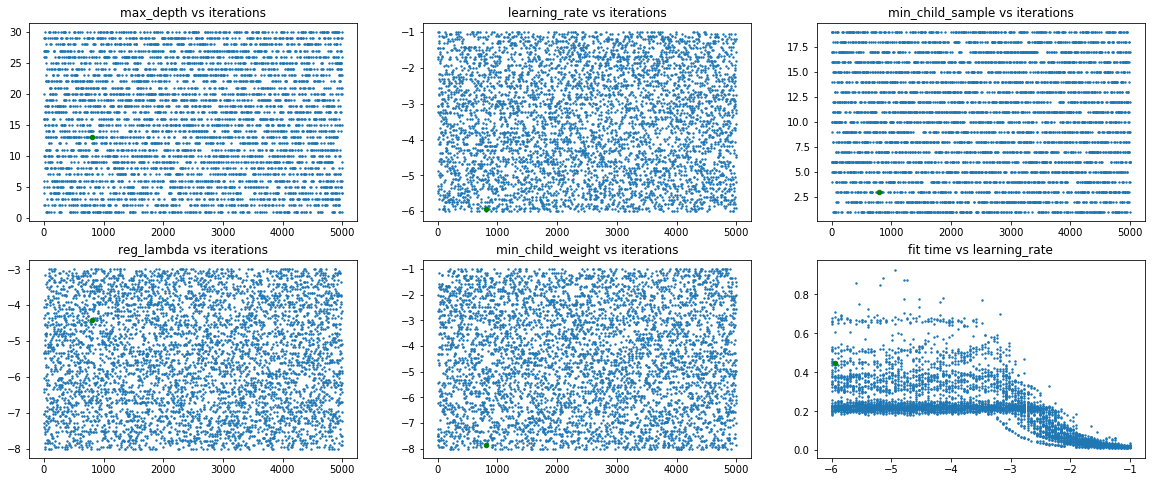

In [20]:
s=2
idx = 800
f, ax = plt.subplots(2, 3, figsize=(20,8))
ax = ax.reshape(-1)
ax[0].scatter(np.arange(len(results_df)), results_df['param_max_depth'], s=s)
ax[0].scatter(np.arange(len(results_df))[idx], results_df['param_max_depth'][idx], s=20, c='g')
ax[0].set_title('max_depth vs iterations')
ax[1].scatter(np.arange(len(results_df)), np.log10(np.array(results_df['param_learning_rate'].values, dtype='float')), s=s)
ax[1].scatter(np.arange(len(results_df))[idx], np.log10(np.array(results_df['param_learning_rate'].values, dtype='float'))[idx], s=20, c='g')
ax[1].set_title('learning_rate vs iterations')
ax[2].scatter(np.arange(len(results_df)), results_df['param_min_child_samples'].values,s=s)
ax[2].scatter(np.arange(len(results_df))[idx], results_df['param_min_child_samples'].values[idx],s=20, c='g')
ax[2].set_title('min_child_sample vs iterations')
ax[3].scatter(np.arange(len(results_df)), np.log10(np.array(results_df['param_reg_lambda'].values, dtype='float')),s=s)
ax[3].scatter(np.arange(len(results_df))[idx], np.log10(np.array(results_df['param_reg_lambda'].values, dtype='float'))[idx],s=20,  c='g')
ax[3].set_title('reg_lambda vs iterations')
ax[4].scatter(np.arange(len(results_df)), np.log10(np.array(results_df['param_min_child_weight'].values, dtype='float')), s=s)
ax[4].scatter(np.arange(len(results_df))[idx], np.log10(np.array(results_df['param_min_child_weight'].values, dtype='float'))[idx], s=20, c='g')
ax[4].set_title('min_child_weight vs iterations')
ax[5].scatter(np.log10(np.array(results_df['param_learning_rate'].values, dtype='float')), results_df['mean_fit_time'].values,  s=s)
ax[5].scatter(np.log10(np.array(results_df['param_learning_rate'].values, dtype='float'))[idx], results_df['mean_fit_time'].values[idx],  s=20, c='g')
ax[5].set_title('fit time vs learning_rate')
print(idx)

In [ ]:
model = LGBMClassifier(n_estimators=n_estimators, **clf.best_params_)
fit_params={
    "early_stopping_rounds":100, 
        "eval_set" : [(X_val, y_val)],
        'eval_names': ['valid'],
        'verbose': 100,
       }
model.fit(X_train, y_train, **fit_params)

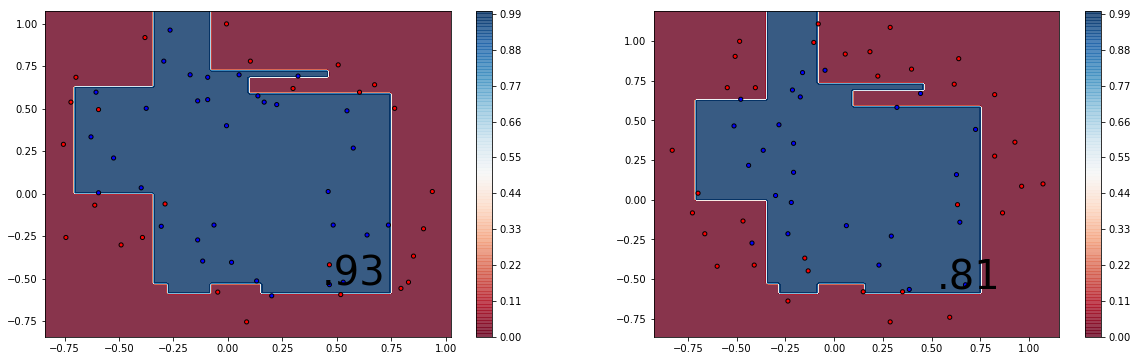

In [34]:
score_train = model.score(X_train, y_train)
score_test = model.score(X_val, y_val)
# Graficamos probabilidades en el plano de la combinación de todos los clasificadores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train, model.predict,  mesh_res=200, ax=ax1, bound_line=False)
RHelper.plot_boundaries(X_val, y_val, score_test, model.predict,  mesh_res=200, ax=ax2, bound_line=False)